# Multiple Linear Regression

In [55]:
import pandas as pd
import matplotlib as plt
import numpy as np
%matplotlib inline

In [56]:
df_index=pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [57]:
#Drop Unecessary columns
df_index.drop(["year","month","Unnamed: 0"],axis=1,inplace=True)
display(df_index.head(5))

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [58]:
#Checking null
df_index.isnull().sum()
#no nulls

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

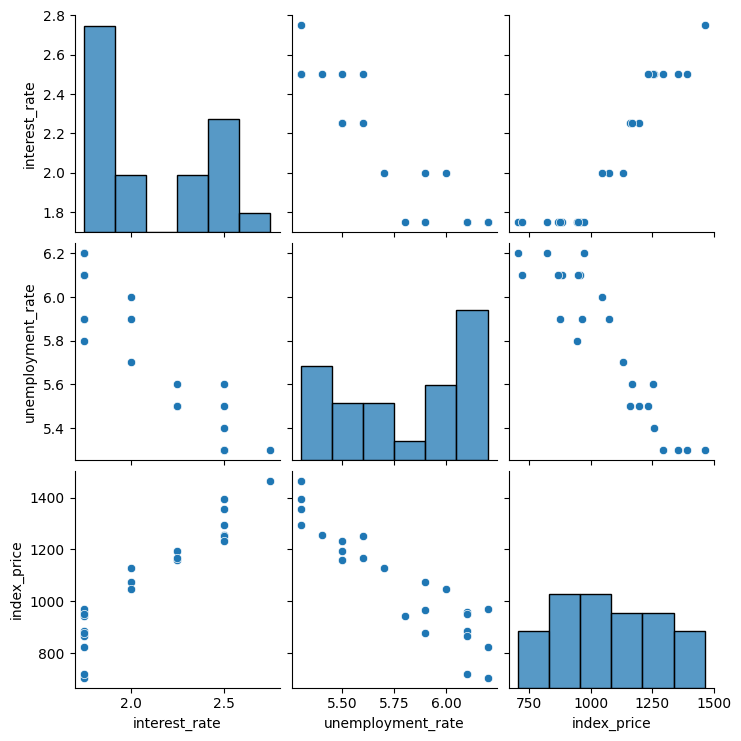

In [59]:
# Visualization
import seaborn as sns
sns.pairplot(df_index)

In [60]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: xlabel='interest_rate', ylabel='index_price'>

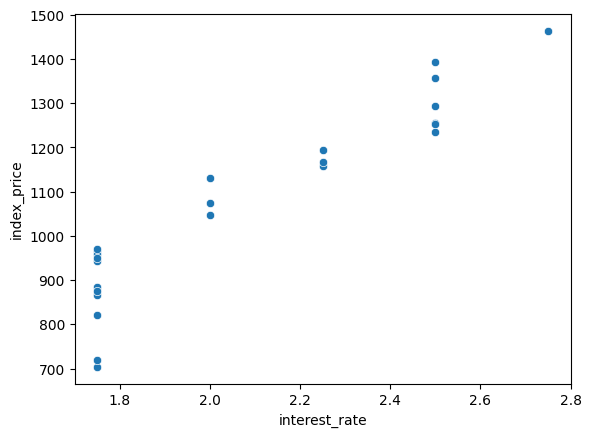

In [61]:
sns.scatterplot(x=df_index["interest_rate"],y=df_index["index_price"])

In [62]:
# Independent and dependent feature
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [63]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.75,random_state=42)

#### Reg Plot

<Axes: xlabel='interest_rate', ylabel='index_price'>

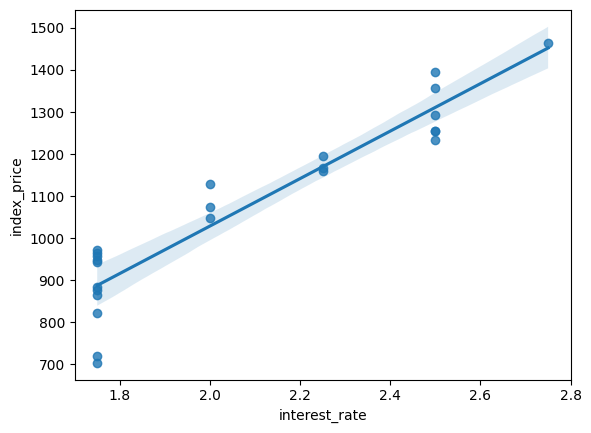

In [64]:
import seaborn as sns
sns.regplot(x=df_index["interest_rate"],y=df_index["index_price"])


<Axes: xlabel='unemployment_rate', ylabel='index_price'>

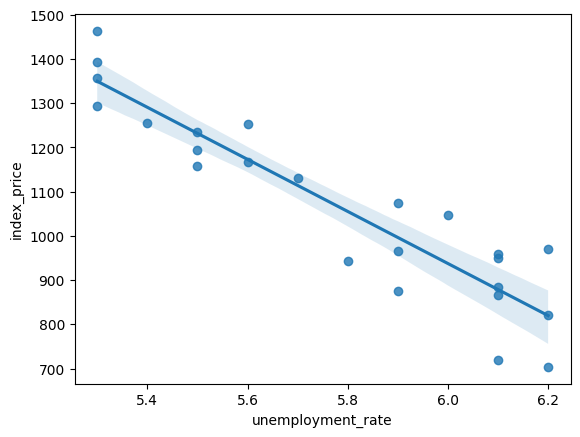

In [65]:
sns.regplot(x=df_index["unemployment_rate"],y=df_index["index_price"])

#### Scaler

In [66]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [67]:
from sklearn.linear_model import LinearRegression
ll=LinearRegression()
regressor=ll.fit(X_train,y_train)


#### Cross validation

Here we are trying to validate if our mode perfomed well or not -- Train data is split in 2 parts train data and validation data

in cross validation we provide

regressor
X_train
y_train
cv=5
now cv means say I have 100 records

I give cv 5 so first it will do 100/5

now will take first 20 for validation and remaining 80 to train


then next 20 for validation and remaining 80 to train and it will repeat the cycle 5 times



In [68]:
from sklearn.model_selection import cross_val_score
#We are using negative mean squared error
validation_score=cross_val_score(regressor,X_train,y_train,scoring="neg_mean_squared_log_error",cv=5)
validation_score

array([-0.00127659, -0.00939335, -0.01094672, -0.01351943, -0.00062059])

#### Predictions

In [69]:
y_pred=regressor.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(score)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.7131630152428576
0.8278978091457145
5793.762887712569
59.935781523235484
76.11677139574805


In [71]:
#Residue
residue=y_pred-y_test

<Axes: xlabel='index_price'>

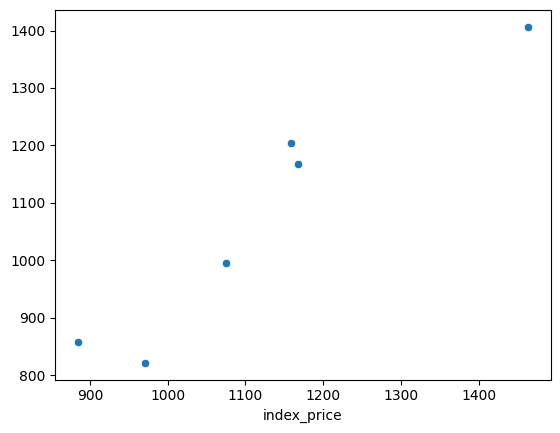

In [72]:
#generating probabilty distribution function of residue
sns.scatterplot(x=y_test,y=y_pred)

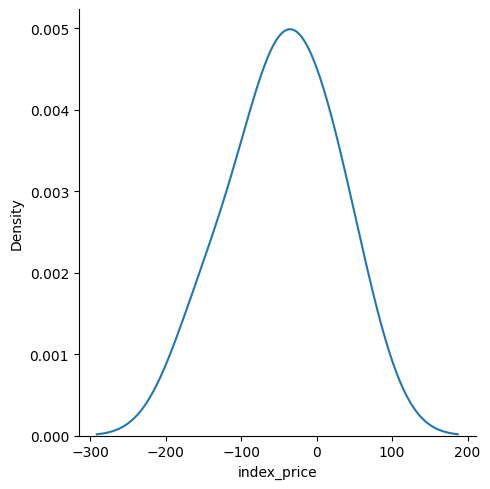

In [73]:
#Plot Residue
sns.displot(residue,kind='kde')
# As we get normal distribution it means our model works

<Axes: ylabel='index_price'>

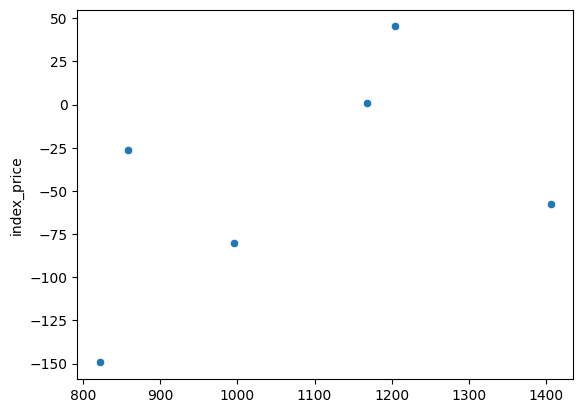

In [74]:
# Scatter plot with respect to prediction and residual
sns.scatterplot(x=y_pred,y=residue)

#there is no pattern that mean as per increase in or decrease in our index price there is no pattern based impact on residue